In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, model_selection, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import resample
from sklearn.manifold import TSNE
import itertools

In [2]:
df=pd.read_csv("credit-card.csv");

First 5 rows of data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking datatypes of data frame

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Histogram of Time Distribution

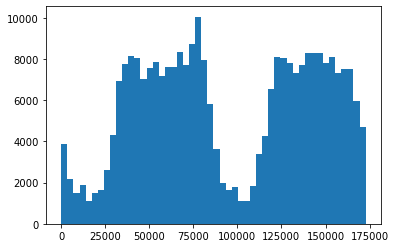

In [5]:
plt.hist(df['Time'], bins=50)
plt.show()

Amount over Time

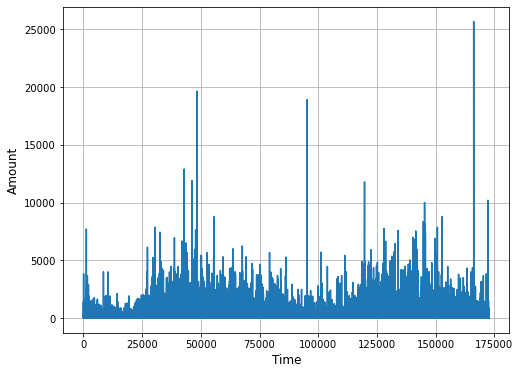

In [6]:
plt.figure(figsize=(8,6))
plt.plot(df['Time'], df['Amount'])
plt.grid()
plt.xlabel("Time", fontsize="12")
plt.ylabel("Amount", fontsize="12")
plt.show()

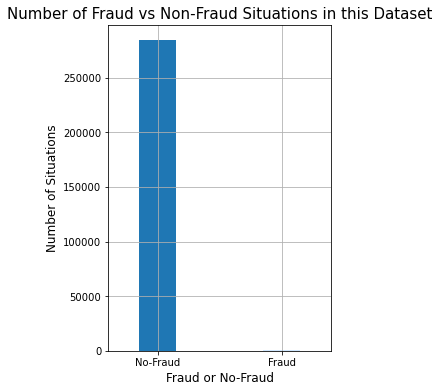

In [7]:
items=pd.DataFrame(df['Class'].value_counts())
items.plot(kind='bar', figsize=(4,6), width=0.3, color=[('#1f77b4', '#d1e8ff')], legend=False)
plt.title("Number of Fraud vs Non-Fraud Situations in this Dataset", fontsize="15")
plt.xlabel("Fraud or No-Fraud", fontsize="12")
plt.ylabel("Number of Situations", fontsize="12")
plt.xticks(np.arange(2),("No-Fraud", "Fraud"), rotation=0)
plt.grid()   
plt.show()

#### Resampling

Resampling needs to be done since it's an unbalanced dataset.  The idea is that we oversample the fraud class since there isn't a lot of data to work with.

In [8]:
y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [9]:
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


In [10]:
not_fraud = X[X['Class']==0]
not_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


In [11]:
fraud=X[X['Class']==1]
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
79525,58060.0,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,-5.074871,...,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1.00,1
53591,46057.0,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
219025,141565.0,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,-0.186207,...,-0.284413,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,4.49,1
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
15204,26556.0,-19.179826,11.817922,-21.919174,6.086236,-14.708845,-4.308888,-15.357952,12.857165,-3.999861,...,1.746802,-1.353149,-0.762965,0.117028,1.297994,-0.224825,1.621052,0.484614,99.99,1


In [12]:
fraud_resampled = resample(fraud,replace=True, n_samples=len(not_fraud), random_state=27) 

In [13]:
resampled = pd.concat([not_fraud, fraud_resampled])

In [14]:
resampled['Class'].value_counts()

1    213245
0    213245
Name: Class, dtype: int64

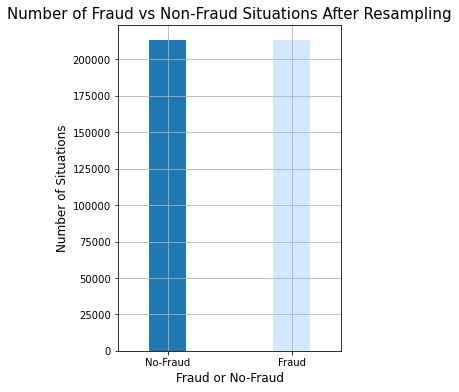

In [15]:
items=pd.DataFrame(resampled['Class'].value_counts())
items.plot(kind='bar', figsize=(4,6), width=0.3, color=[('#1f77b4', '#d1e8ff')], legend=False)
plt.title("Number of Fraud vs Non-Fraud Situations After Resampling", fontsize="15")
plt.xlabel("Fraud or No-Fraud", fontsize="12")
plt.ylabel("Number of Situations", fontsize="12")
plt.xticks(np.arange(2),("No-Fraud", "Fraud"), rotation=0)
plt.grid()   
plt.show()

In [16]:
train, test = train_test_split(resampled, test_size = 0.25) 
y_train = train['Class']
X_train = train[[x for x in train.columns if 'Class' not in x]]
y_test = test['Class']
X_test = test[[x for x in test.columns if 'Class' not in x]]

#### Logistic Regression

In [17]:
logreg = linear_model.LogisticRegression()

In [18]:
logreg.fit(X_train, y_train)

c:\users\kurnia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
y_pred=logreg.predict(X_test)

In [20]:
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("Recall score: ", metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("Precision score: ", metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("F1 score: ", metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  0.950226498973017
Recall score:  0.950226498973017
Precision score:  0.950830877501318
F1 score:  0.9502094601502903


In [21]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
print(results)

c:\users\kurnia\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.94335199 0.94131991 0.94335199 0.91965486 0.94241411 0.91902961
 0.94313315 0.94288126 0.9413806  0.94078659]


In [22]:
print("Cross validation average accuracy with 10-folds: %.3f" % (results.mean()))

Cross validation average accuracy with 10-folds: 0.938


In [23]:
cm = confusion_matrix(y_test, y_pred)

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[51654  1677]
 [ 3630 49662]]


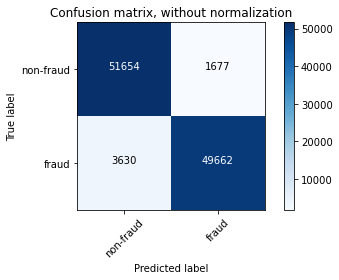

In [25]:
plt.figure()
plot_confusion_matrix(cm, classes=['non-fraud','fraud'], title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[0.96855487 0.03144513]
 [0.06811529 0.93188471]]


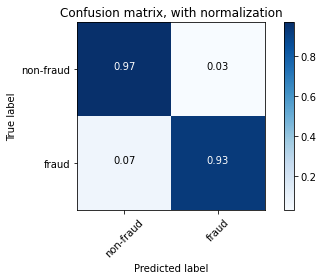

In [26]:
plt.figure()
plot_confusion_matrix(cm, classes=['non-fraud','fraud'], normalize=True, title='Confusion matrix, with normalization')
plt.show()

ROC Curve

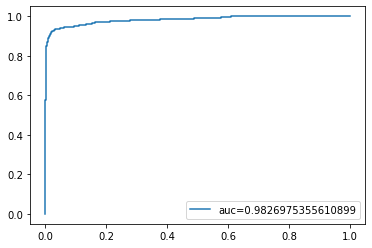

In [27]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()